# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

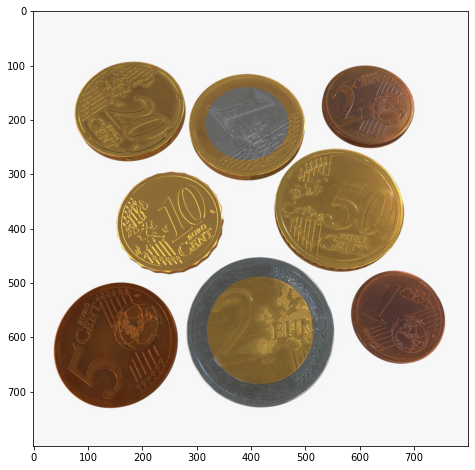

In [3]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

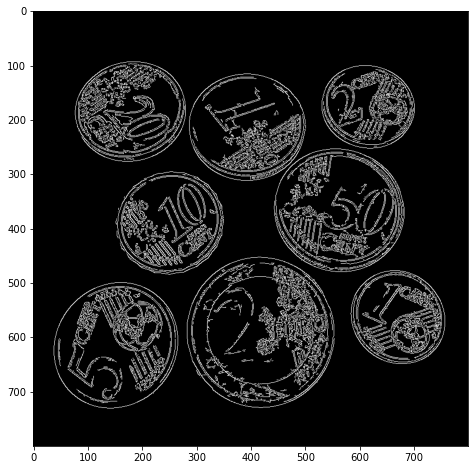

In [60]:
# Convert the image above to grayscale
gray_coins = cv2.imread('img/coins5.jpg')
gray_coins = cv2.cvtColor(gray_coins, cv2.COLOR_BGR2GRAY)


# Apply some gaussian blur to it (try differente size kernels)
gray1 = cv2.GaussianBlur(gray_coins,(1,1), cv2.IMREAD_UNCHANGED)


# Apply Canny to find edges and display the image 
gray = cv2.Canny(gray1, 75, 30)


plt.figure(figsize = (12,8))
plt.imshow(gray, 'gray')


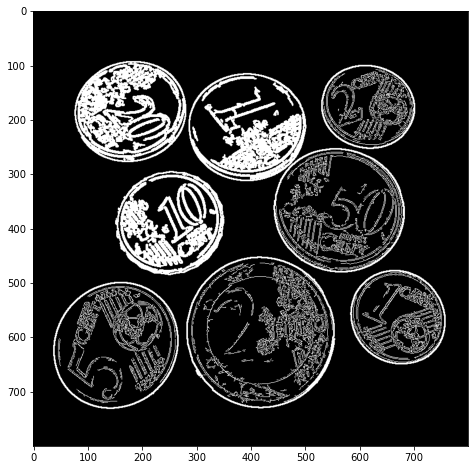

In [75]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?

contours, h = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
coins_with_contours = gray.copy()
cv2.drawContours(coins_with_contours, contours, -1, (255, 0, 255), 2)

plt.figure(figsize = (12,8))
plt.imshow(coins_with_contours, 'gray')


[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [77]:
# print the number of contours that has been found
print(coins_with_contours)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

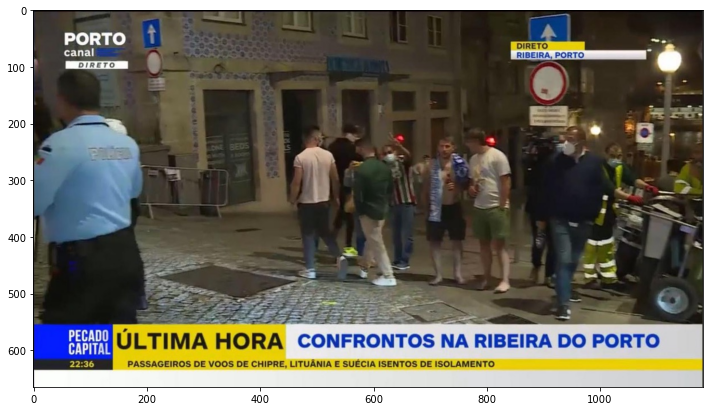

In [81]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise

pic = cv2.imread('img/porto_news.jpeg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,12))
plt.imshow(pic)

[[[ 30  35  55]
  [ 22  25  44]
  [  5   7  20]
  ...
  [  0   1   0]
  [  7   9   8]
  [ 32  34  33]]

 [[ 31  36  56]
  [ 23  26  43]
  [  8  10  23]
  ...
  [  0   1   0]
  [  8  10   9]
  [ 32  34  33]]

 [[ 30  33  52]
  [ 24  27  42]
  [ 18  20  32]
  ...
  [  5   5   5]
  [ 12  12  12]
  [ 35  35  35]]

 ...

 [[255   0 255]
  [255   0 255]
  [255   0 255]
  ...
  [255   0 255]
  [255   0 255]
  [255   0 255]]

 [[255   0 255]
  [255   0 255]
  [255   0 255]
  ...
  [255   0 255]
  [255   0 255]
  [255   0 255]]

 [[255   0 255]
  [255   0 255]
  [255   0 255]
  ...
  [255   0 255]
  [255   0 255]
  [255   0 255]]]


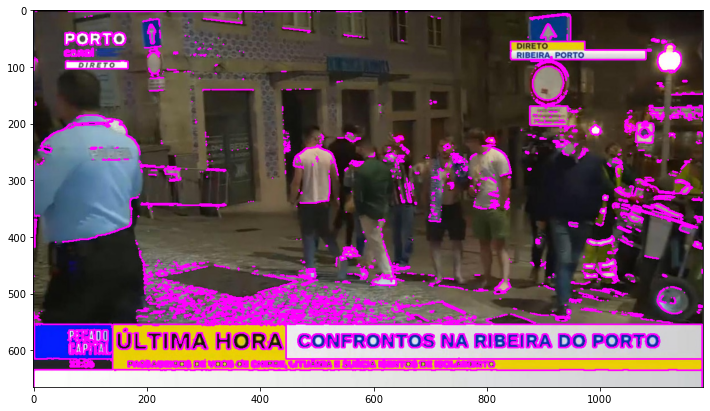

In [98]:
pic2 = pic.copy()

# Apply some gaussian blur to it (try differente size kernels)
gray1 = cv2.GaussianBlur(pic2,(1,1), cv2.IMREAD_UNCHANGED)

# Apply Canny to find edges and display the image 
gray = cv2.Canny(pic2, 200, 200)


contours, h = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
pic_with_contours = pic2.copy()
cv2.drawContours(pic_with_contours, contours, -1, (255, 0, 255), 2)

plt.figure(figsize = (12,12))
plt.imshow(pic_with_contours)

print(pic_with_contours)

## Sorting Contours

### By area

In [97]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [103]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var

var = get_contour_areas()

error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-0x3h2khn/opencv/modules/imgproc/src/shapedescr.cpp:315: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'contourArea'


In [ ]:
# Print the contour areas to screen


In [ ]:
# Now sort the areas by biggest to smallest and print the sorted areas


[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [ ]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas


In [ ]:
# Filter out only the 5 biggest contours and print them


[Hint](# "Just slice the array!") 

In [ ]:
# Now in a clean image draw the contours you just filtered out and display it


In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [ ]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [ ]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right


In [ ]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
